<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/Macros/TrkAna_CRY2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install uproot

In [0]:
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from plotly import graph_objs as go
import pylab
import seaborn as sns

In [0]:
import sys
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/root_files/nts.owner.stage1-dsstops-CRV.g4-10-5.root'

'/content/drive/My Drive/root_files/nts.owner.stage1-dsstops-CRV.g4-10-5.root'


In [0]:
def plot2d(crvdf_colx, crvdf_coly, padx, pady):
    ax[padx,pady].hist2d(crvdf_colx, crvdf_coly, bins=(200, 200), cmap=plt.cm.rainbow, norm=mcolors.LogNorm())
    ax[padx,pady].set_aspect('equal')
    ax[padx,pady].set_xlabel(crvdf_colx.name)
    ax[padx,pady].set_ylabel(crvdf_coly.name)

In [0]:
fileCV = uproot.open(main_path+"root_files/step1stana.cry0919_minedep-filter.round9.low14.crv.root")
fileDS = uproot.open(main_path+"root_files/step1stana.cry0919_minedep-filter.round9.low14.ds.root")
                        
cvtree = fileCV["HitDumper"]["nt"]
dstree = fileDS["HitDumper"]["nt"]

In [0]:
cvdf = cvtree.pandas.df(flatten=False)
dsdf = dstree.pandas.df(flatten=False)

# Low energy deposition events distributions at the CRV and DS

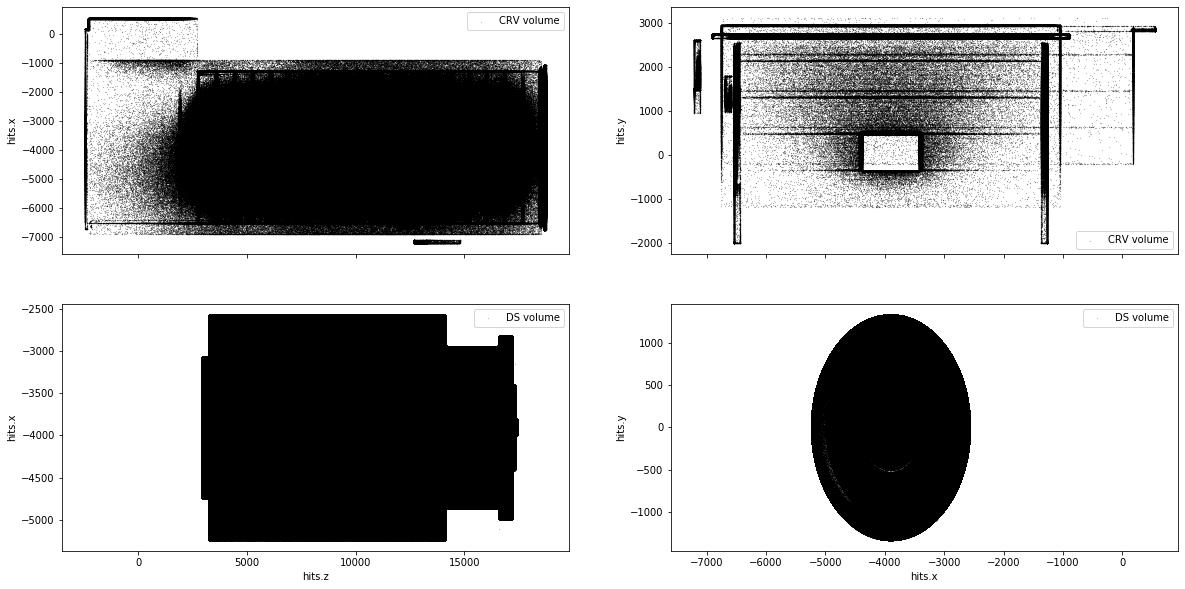

In [0]:
fig, axes = plt.subplots(2, 2, sharex='col',figsize=(20,10))
cvdf.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[0,0], label='CRV volume')
cvdf.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[0,1], label='CRV volume')
dsdf.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[1,0], label='DS volume')
dsdf.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[1,1], label='DS volume')

# Low energy deposition events distributions at the CRV and DS: ALL

''

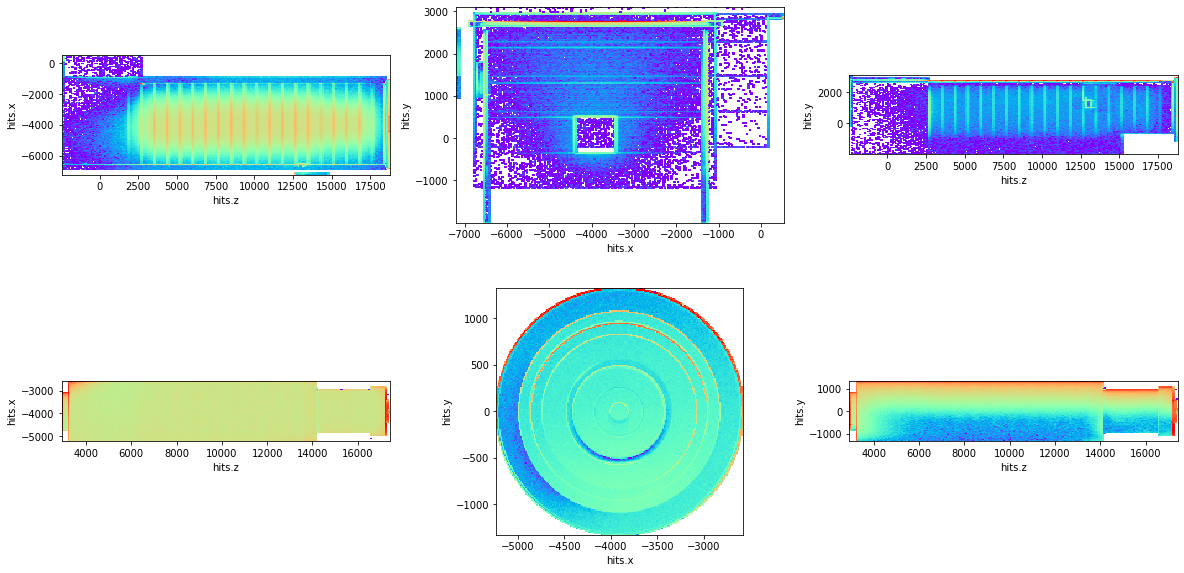

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
plot2d(cvdf['hits.z'], cvdf['hits.x'], 0, 0)
plot2d(cvdf['hits.x'], cvdf['hits.y'], 0, 1)
plot2d(cvdf['hits.z'], cvdf['hits.y'], 0, 2)

plot2d(dsdf['hits.z'], dsdf['hits.x'], 1, 0)
plot2d(dsdf['hits.x'], dsdf['hits.y'], 1, 1)
plot2d(dsdf['hits.z'], dsdf['hits.y'], 1, 2)
;

# Low energy deposition events distributions at the CRV and DS

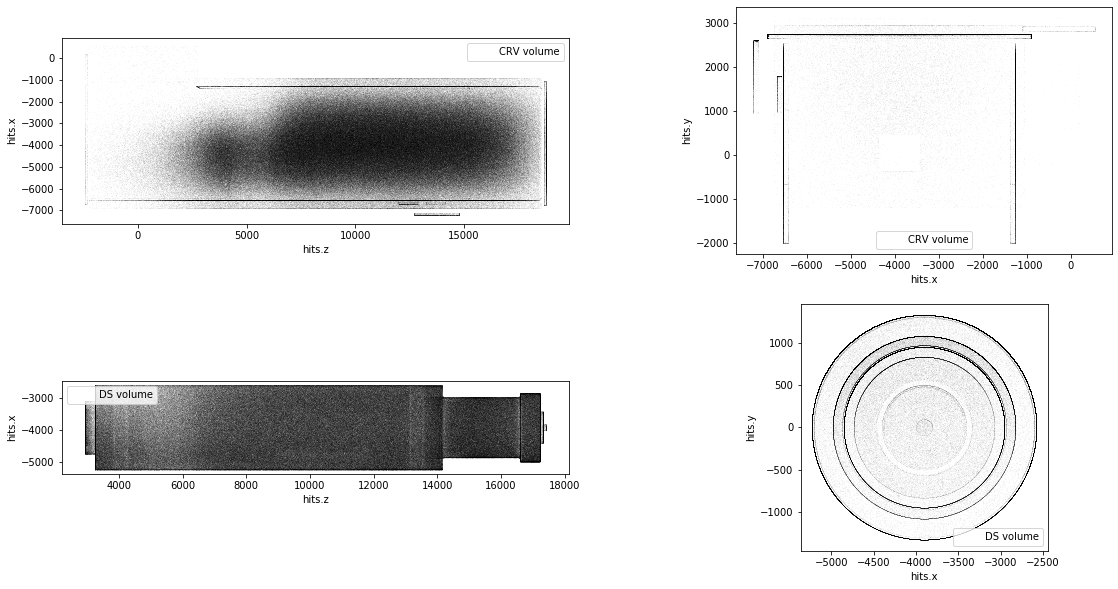

In [0]:
dsdfcut = dsdf.loc[(dsdf['hits.pdgId'] == 2112)]
cvdfcut = cvdf.loc[(cvdf['hits.pdgId'] == 2112)]

fig, axes = plt.subplots(2, 2,figsize=(20,10))
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

cvdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.0001, ax=axes[0,0], label='CRV volume')
cvdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.0001, ax=axes[0,1], label='CRV volume')
dsdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.0001, ax=axes[1,0], label='DS volume')
dsdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.0001, ax=axes[1,1], label='DS volume')

# Gap muons distributions at the CRV and DS

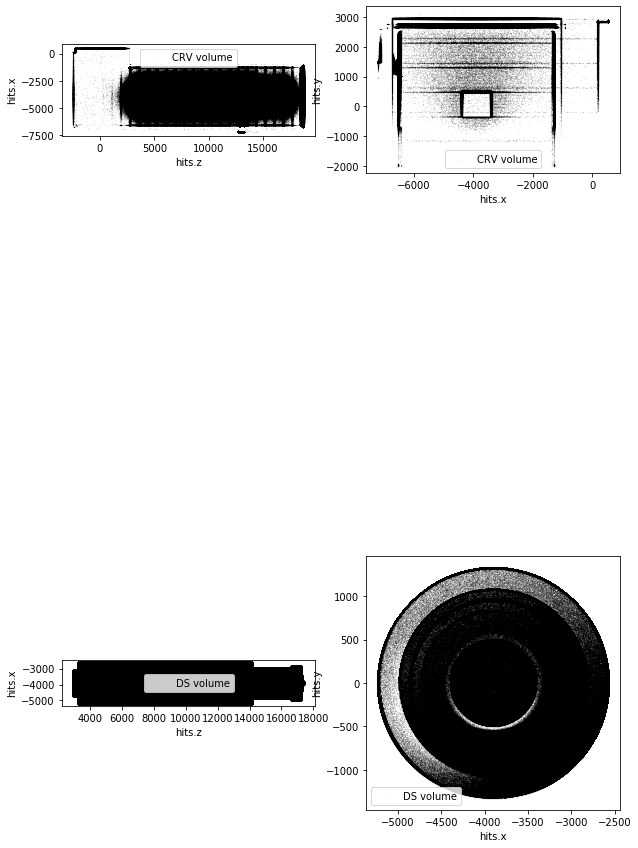

In [0]:
dsdfcut = dsdf.loc[(dsdf['hits.pdgId'] == 13)]
cvdfcut = cvdf.loc[(cvdf['hits.pdgId'] == 13)]

fig, axes = plt.subplots(2, 2,figsize=(10,20))
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

cvdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[0,0], label='CRV volume')
cvdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[0,1], label='CRV volume')
dsdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[1,0], label='DS volume')
dsdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[1,1], label='DS volume')


#Energy distributions at DS

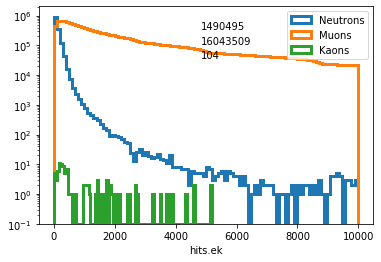

In [0]:
neutr = dsdf.loc[(dsdf['hits.ek'] < 10000) & (dsdf['hits.pdgId'] == 2112)]
muons = dsdf.loc[(dsdf['hits.ek'] < 10000) & (abs(dsdf['hits.pdgId']) == 13)]
kaons = dsdf.loc[(dsdf['hits.ek'] < 10000) & (dsdf['hits.pdgId'] == 130)]
sns.distplot(neutr['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Neutrons")
sns.distplot(muons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Muons")
sns.distplot(kaons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Kaons")

plt.figtext(0.5,0.80, len(dsdf.loc[dsdf['hits.pdgId'] == 2112].index))
plt.figtext(0.5,0.75, len(dsdf.loc[abs(dsdf['hits.pdgId']) == 13].index))
plt.figtext(0.5,0.70, len(dsdf.loc[dsdf['hits.pdgId'] == 130].index))
plt.legend()


#Energy distributions at CRV

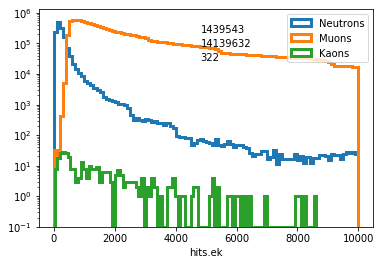

In [0]:
neutr = cvdf.loc[(cvdf['hits.ek'] < 10000) & (cvdf['hits.pdgId'] == 2112)]
muons = cvdf.loc[(cvdf['hits.ek'] < 10000) & (abs(cvdf['hits.pdgId']) == 13)]
kaons = cvdf.loc[(cvdf['hits.ek'] < 10000) & (cvdf['hits.pdgId'] == 130)]
sns.distplot(neutr['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Neutrons")
sns.distplot(muons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Muons")
sns.distplot(kaons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Kaons")

plt.figtext(0.5,0.80, len(cvdf.loc[cvdf['hits.pdgId'] == 2112].index))
plt.figtext(0.5,0.75, len(cvdf.loc[abs(cvdf['hits.pdgId']) == 13].index))
plt.figtext(0.5,0.70, len(cvdf.loc[cvdf['hits.pdgId'] == 130].index))
plt.legend()

In [0]:
cvdf['hits.ek'].loc[cvdf['hits.pdgId'] == 2112].describe().loc[['mean','std','count']]


mean     2.885597e+02
std      7.594592e+02
count    1.439543e+06
Name: hits.ek, dtype: float64

In [0]:
cvdf['hits.ek'].loc[abs(cvdf['hits.pdgId']) == 13].describe()


count    1.413963e+07
mean     5.114429e+03
std      1.428790e+04
min      2.790641e+00
25%      1.104455e+03
50%      2.176301e+03
75%      4.928880e+03
max      5.882426e+06
Name: hits.ek, dtype: float64

In [0]:
cvdf['hits.ek'].loc[cvdf['hits.pdgId'] == 130].describe().loc[['mean','std','count']]

mean     1826.393677
std      3161.673340
count     322.000000
Name: hits.ek, dtype: float64

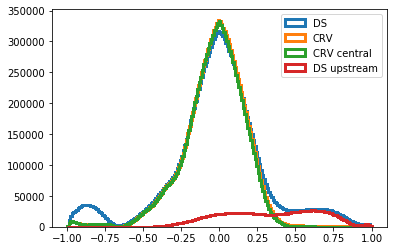

In [0]:
muons_dsv = dsdf.loc[(abs(dsdf['hits.pdgId']) == 13)]
muons_crv = cvdf.loc[(abs(cvdf['hits.pdgId']) == 13)]

muons_dsv_upst = dsdf.loc[(abs(dsdf['hits.pdgId']) == 13) & (dsdf['hits.z'] < 4000)]
muons_crv_cent = cvdf.loc[(abs(cvdf['hits.pdgId']) == 13) & (cvdf['hits.z'] > 3000)]

sns.distplot(muons_dsv['hits.pz']/muons_dsv['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="DS")
sns.distplot(muons_crv['hits.pz']/muons_crv['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="CRV")
sns.distplot(muons_crv_cent['hits.pz']/muons_crv_cent['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="CRV central")
sns.distplot(muons_dsv_upst['hits.pz']/muons_dsv_upst['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="DS upstream")
plt.legend()

angle = muons_crv['hits.pz']/muons_crv['hits.pmag']

#sns.jointplot(x=muons_crv['hits.pz']/muons_crv['hits.pmag'], y="hits.z", data=muons_crv, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6)
#sns.jointplot(x=angle, y="hits.z", data=muons_crv, kind="kde", space=0, color="g", ratio=1)